In [3071]:
#Matheus Magalhaes Ribeiro - UFMG
import random as rd
import numpy as np

In [3072]:
crossover_rate = 1
mutation_rate = 0.8 
def init_population(_mu:int = 20, n:int = 8):
    #O valor de N foi trocado manualmente e os resultados dos garficos estao no PDF em anexo
    population = []
    for i in range (_mu):
        population.append(rd.sample(range(n), n))
    return population

pop = init_population(20, 8)
print(pop)


[[4, 5, 2, 6, 3, 0, 1, 7], [3, 7, 5, 6, 2, 0, 1, 4], [7, 6, 2, 5, 3, 1, 0, 4], [3, 0, 4, 2, 1, 5, 7, 6], [3, 4, 2, 7, 0, 6, 1, 5], [5, 0, 2, 4, 1, 6, 7, 3], [7, 0, 5, 4, 6, 2, 1, 3], [1, 4, 3, 5, 0, 2, 7, 6], [0, 2, 7, 3, 4, 1, 5, 6], [5, 1, 3, 2, 0, 4, 7, 6], [2, 5, 1, 4, 6, 7, 0, 3], [3, 6, 2, 7, 0, 4, 5, 1], [2, 6, 1, 5, 3, 7, 0, 4], [5, 7, 3, 1, 6, 2, 4, 0], [2, 6, 3, 4, 7, 5, 0, 1], [6, 5, 4, 0, 1, 2, 7, 3], [6, 0, 5, 3, 7, 1, 2, 4], [5, 4, 1, 3, 7, 0, 2, 6], [7, 3, 0, 6, 5, 2, 1, 4], [3, 6, 7, 2, 5, 4, 0, 1]]


In [3073]:
def fitness_nq(solution):
    #pop_fitenss retorna o valor de cada fitness do tabuleiro de Xadrez
    xeques = 0
    for i in range(0,len(solution)):
        for j in range(0,len(solution)):
            if i!=j:
                if i-solution[i] == j-solution[j] or i+solution[i] == j+solution[j]:
                    xeques+=1
    return xeques


In [3074]:
pop_fitness = [fitness_nq(each_solution) for each_solution in pop]
print(pop_fitness)


[10, 10, 8, 10, 4, 8, 22, 10, 10, 16, 10, 4, 10, 8, 6, 12, 12, 10, 10, 12]


In [3075]:
def selection(pop):
#funcao retorna entre 5 solucoes aleatorias, as duas melhores (melhores fitness)
    soluction_index = []
    count = 0
    pop_five =[]
    pop_two = [] 
    #funcao pega cinco valores aleatorios de indice e depois seleciona os valores no vetor populacao 
    while len(soluction_index) != 5: 
        aux_rand = rd.randint(0,len(pop_fitness)-1)
        if (aux_rand not in soluction_index):
            soluction_index.append(aux_rand)
            pop_five.append(pop[soluction_index[count]])
            count = count + 1
    #Usa-se a funcao pop_five para descobrir o fitness desses cinco valores
    pop_fitness_five = [fitness_nq(each_solution) for each_solution in pop_five]
    #Use-se o aux para pegar o indice do menor valor de fitness no indice(melhor caso)
    aux = min(pop_fitness_five)
    index = pop_fitness_five.index(aux)
    pop_two.append(pop_five[index])
    #Use-se o m1 para pegar o indice do segundo menor valor de fitness no indice(segundo melhor caso)
    m1, m2 = float('inf'), float('inf')
    for x in pop_fitness_five:
        if x <= m1:
            m1, m2 = x, m1
        elif x < m2:
            m2 = x
    index = pop_fitness_five.index(m2)
    pop_two.append(pop_five[index])
    return pop_two


In [3076]:
def crossover(subset_parent, crossover_rate):
#retorna um subset (dois individuos) como resultado do cruzamento dos pais
    subset_father = subset_parent[0]
    subset_mother = subset_parent[1]
    subset_children_one = np.append(subset_father[:crossover_rate],subset_mother[crossover_rate:])
    subset_children_two = np.append(subset_mother[:crossover_rate],subset_father[crossover_rate:])
    subset_children_one = subset_children_one.tolist()
    subset_children_two = subset_children_two.tolist()
    subset_children = []
    subset_children.append(subset_children_one)
    subset_children.append(subset_children_two)
    return subset_children

In [3077]:
def mutation(offspring, mutation_rate):
#retorna um subset (dois individuos) como resultado da mutacao dos filhos
    #um condicional simples que faz uma comparacao entre valores de 0 e 1 ate 
    #a taxa de mutacao definida no inicio do codigo
    if np.random.uniform(0,1) < mutation_rate:
        offspring[0][rd.randint(0,7)] = np.random.randint(0,8)
    if np.random.uniform(0,1) < mutation_rate:
        offspring[1][rd.randint(0,7)] = np.random.randint(0,8)
    return offspring

In [3078]:
def replacement(offspring_new,pop):
#atualiza a lista de populacao, substituindo os dois piores individuos pelos dois 
#que fazem parte do offspring_new
    pop_fitness = [fitness_nq(each_solution) for each_solution in pop]
    #pega o maior valor (pior caso) atraves de aux_max da populacao
    aux_max = max(pop_fitness)
    index_max = pop_fitness.index(aux_max)
    #pega o segundo maior valor(segundo pior caso) atraves do m2 da populacao
    m1 = m2 = float('-inf')
    for x in pop_fitness:
        if x > m2:
            if x >= m1:
                m1, m2 = x, m1            
            else:
                m2 = x
    index_max_two = pop_fitness.index(m2)
    pop[index_max] = offspring[0]
    pop[index_max_two] = offspring[1]
    return pop    

In [3079]:
def evolution(pop):
#retorna fitness_best e fitness_mean
    fitness_best = min([fitness_nq(each_solution) for each_solution in pop])
    fitness_mean = sum([fitness_nq(each_solution) for each_solution in pop])/20
    return fitness_best,fitness_mean

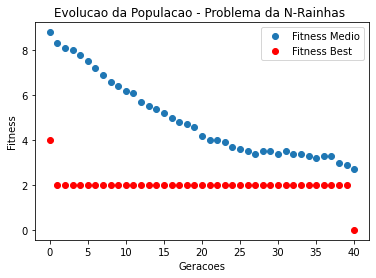

In [3080]:
import matplotlib.pyplot as plt
i_geracoes = 0
crossover_rate = 1
fitness_best_vector = []
fitness_mean_vector = []
fitness_best = 1
while i_geracoes <= 100 and fitness_best != 0:
    subset_parents = selection(pop) #selecao 2 individuos mais aptos para o cruzamento
    offspring = crossover(subset_parents,crossover_rate)
    offspring_new = mutation(offspring, mutation_rate) #atualizacao da populacao
    pop = replacement(offspring_new,pop)
    fitness_best, fitness_mean = evolution(pop)
    i_geracoes = i_geracoes + 1
    fitness_best_vector.append(fitness_best)
    fitness_mean_vector.append(fitness_mean)
    pop_fitness = [fitness_nq(each_solution) for each_solution in pop]

vector_x_geracao = list(range(0, i_geracoes, 1))
vector_y_fitness_best = fitness_best_vector
vector_y_fitness_mean = fitness_mean_vector

ax1 = plt.subplots()

plt.plot(vector_x_geracao, vector_y_fitness_mean,'o')
plt.plot(vector_x_geracao, vector_y_fitness_best,'o',color='Red')
plt.ylabel('Fitness')
plt.xlabel('Geracoes')
plt.legend(['Fitness Medio','Fitness Best'])
plt.title('Evolucao da Populacao - Problema da N-Rainhas ')
plt.show()